# Exploratory Data Analysis of unicorn companies

## Introduction

In this project, I will help an investing firm decide which companies to invest in next. I will provide them with insights into **unicorn companies**-companies that are valued at over one billion dollars.

## Step 1: Imports

### Import libraries and packages 

In [1]:
# Import libraries and packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration

In [3]:
# Display the first 10 rows of the data

companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


>The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.

>The "Select Investors" column represents the top investors in the company. Note that some companies have less than 4 investors.

In [5]:
# Shape of the dataset

companies.shape

(1074, 10)

> The shape of the dataset is (1074, 10). The first number, 1074, represents the number of rows. The second number, 10, represents the number of columns. According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company.

In [6]:
# Get information

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


> `Dtype` is listed as `int64` in the `Year Founded` column. This means that the year a company was founded is represented as an integer.

>`Dtype` is listed as `object` for the `Date Joined` column. This means that the date a company became a unicorn is represented as an object. We need to change the data type to 'datetime' to execute better analysis.

### Convert the `Date Joined` column to datetime

In [10]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [14]:
# Confirm that the update actually took place

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


## Step 3: Statistical tests

In [15]:
# Find descriptive statistics

companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


>The minimum value in the `Year Founded` column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.

>The maximum value in the `Year Founded` column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

### Create a `Year Joined` column

I will extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [16]:
companies['Year Joined'] = companies['Date Joined'].dt.year

In [17]:
# Confirm that the new column did get added

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Step 4: Results and evaluation


### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA. But I may encounter scenarios in the future where I will need to take a sample of the data due to time and resource limitations. For the purpose of developing my skills around sampling, I'm going to take a sample of the data and work with that sample for the next steps of analysis.

In [18]:
companies_sample = companies.sample(n=50, random_state=0)

### Visualize the time it took companies to reach unicorn status

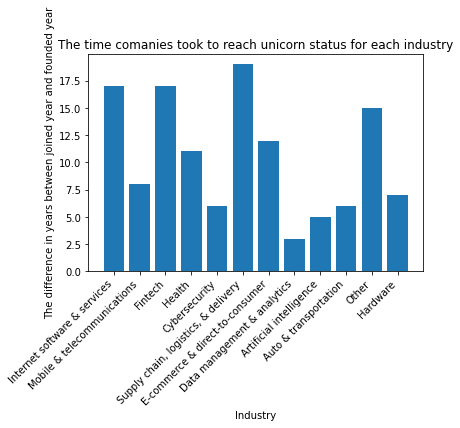

In [19]:
plt.bar(x=companies_sample.Industry, height=companies_sample['Year Joined']-companies_sample['Year Founded'])

plt.title("The time comanies took to reach unicorn status for each industry")
plt.xlabel('Industry')
plt.ylabel('The difference in years between joined year and founded year')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

>This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Supply chain, logistic, & delivery industry, while the smalles value occurred in the Data management & analytics industry.

### Visualize the maximum unicorn company valuation per industry

In [21]:
# Create a column representing company valuation as numeric data

companies_sample['Valuation_num'] = companies_sample.Valuation.str.slice(start=1, stop=-1).astype(int)
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
239,Zapier,$4B,2021-01-14,Internet software & services,Sunnyvale,United States,North America,2011,$1M,"Sequoia Capital, Bessemer Venture Partners, Th...",2021,4
642,TalkingData,$1B,2021-01-06,Mobile & telecommunications,Beijing,China,Asia,2013,$310M,"N5 Capital, CR Capital Mgmt, JD Digits",2021,1
722,Signifyd,$1B,2021-04-15,Fintech,San Jose,United States,North America,2011,$390M,"Menlo Ventures, Resolute Ventures, IA Ventures",2021,1
484,Wave,$2B,2021-09-07,Fintech,Dakar,Senegal,Africa,2018,$200M,"Stripe, Founders Fund, Partech Partners",2021,2
984,Omada Health,$1B,2022-02-23,Health,San Francisco,United States,North America,2011,$449M,"U.S. Venture Partners, dRx Capital, Andreessen...",2022,1


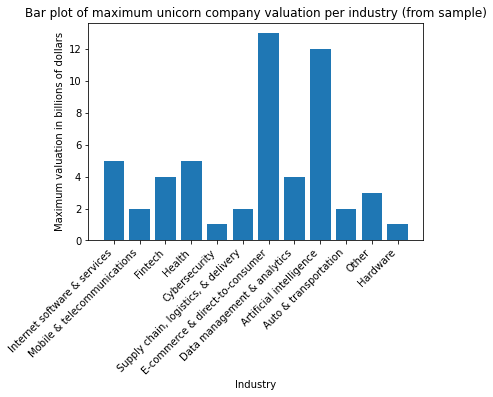

In [22]:
plt.bar(x=companies_sample.Industry, height=companies_sample.Valuation_num)

plt.xlabel('Industry')
plt.ylabel('Maximum valuation in billions of dollars')
plt.title('Bar plot of maximum unicorn company valuation per industry (from sample)')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

>This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the E-commerce & direct-to-consumer industry, while the lowest maximum valuation occurred in the Cybersecurity and Hardware industries.

## Considerations

**Findings I would share with others**

- There are 1074 unicorn companies represented in this dataset.
- Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model. 

**Recommendations I would share with stakeholders based on these findings?**

It may be helpful to focus more on industry specifics. Next steps to consider:
- Identify the main industries that the investing firm is interested in investing in. 
- Select a subset of this data that includes only companies in those industries. 
- Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in. 

**References**

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 

